# Lab 7.1: Нейронні мережі в розпізнаванні образів. Частина 1
### Шевченко Юлія, ФІ-31мн

## Binary Traffic Sign Classificator

In this homework, you are going to use the code from ```TrafficSignsClassification``` notebook and create your own traffic sign classifier.

In [25]:
# All the imports for the task
import os

import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Step 1: Visualize some examples and count images for each class
data_dir = '../Lab_7/traffic_signs_set'
classes = os.listdir(data_dir)
num_images_per_class = {}

for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    num_images = len(os.listdir(class_dir))
    num_images_per_class[class_name] = num_images
    print('Class: {}, Number of Images: {}'.format(class_name, num_images))

Class: class_id_0, Number of Images: 2220
Class: class_id_1, Number of Images: 2250


In [3]:
# Step 2: Define the model with one single neuron
def create_single_neuron_model(input_shape):
    model = models.Sequential([
        layers.Flatten(input_shape=input_shape),
        layers.Dense(1, activation='sigmoid')
    ])
    
    return model

In [4]:
# Step 3: Train the model with one single neuron
def train_model(model, X_train, y_train, X_val, y_val, batch_size=32, epochs=10):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    checkpoint = ModelCheckpoint('one_neuron.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[checkpoint])
    
    return history

In [5]:
# Step 4: Load and preprocess the data
image_size = (32, 32)
batch_size = 32

def load_and_preprocess_data(data_dir, image_size):
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
    train_generator = datagen.flow_from_directory(data_dir, target_size=image_size, batch_size=batch_size, class_mode='binary', subset='training')
    val_generator = datagen.flow_from_directory(data_dir, target_size=image_size, batch_size=batch_size, class_mode='binary', subset='validation')
    
    return train_generator, val_generator

In [6]:
train_generator, val_generator = load_and_preprocess_data(data_dir, image_size)

Found 3576 images belonging to 2 classes.
Found 894 images belonging to 2 classes.


In [7]:
# Step 5: Split the data into training, and validation sets
# No need to do this since we're using data generators

In [8]:
# Step 6: Create and compile the model
model = create_single_neuron_model(input_shape=(image_size[0], image_size[1], 3))  # 3 for RGB channels
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1)                 3073      
                                                                 
Total params: 3073 (12.00 KB)
Trainable params: 3073 (12.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Step 7: Train the model
history = train_model(model, train_generator, None, val_generator, None, batch_size=batch_size)

Epoch 1/10
109/112 [============================>.] - ETA: 0s - loss: 0.6321 - accuracy: 0.6425
Epoch 1: val_accuracy improved from -inf to 0.74720, saving model to best_model.keras
112/112 [==============================] - 2s 12ms/step - loss: 0.6327 - accuracy: 0.6418 - val_loss: 0.5774 - val_accuracy: 0.7472
Epoch 2/10
112/112 [==============================] - ETA: 0s - loss: 0.5224 - accuracy: 0.7847
Epoch 2: val_accuracy improved from 0.74720 to 0.79306, saving model to best_model.keras
112/112 [==============================] - 1s 10ms/step - loss: 0.5224 - accuracy: 0.7847 - val_loss: 0.5118 - val_accuracy: 0.7931
Epoch 3/10
106/112 [===========================>..] - ETA: 0s - loss: 0.4731 - accuracy: 0.8236
Epoch 3: val_accuracy improved from 0.79306 to 0.84452, saving model to best_model.keras
112/112 [==============================] - 1s 10ms/step - loss: 0.4713 - accuracy: 0.8255 - val_loss: 0.4678 - val_accuracy: 0.8445
Epoch 4/10
106/112 [===========================>..] 

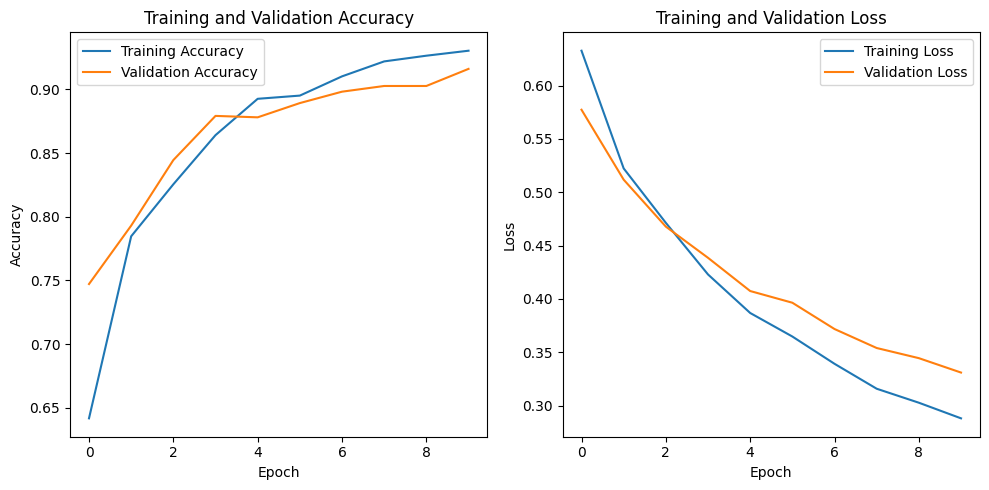

In [10]:
# Step 8: Plot the training history to see accuracy and loss curves
def plot_history(history):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

In [11]:
# Step 9: Evaluate the model on the test set
def evaluate_model(model, test_generator):
    model.load_weights('one_neuron.keras')
    loss, accuracy = model.evaluate(test_generator)
    print('Test Loss: {}, Test Accuracy: {}'.format(loss, accuracy))

In [12]:
# Test the model
test_generator = val_generator
evaluate_model(model, test_generator)

28/28 [==============================] - 0s 9ms/step - loss: 0.3310 - accuracy: 0.9161
Test Loss: 0.3309519588947296, Test Accuracy: 0.9161073565483093


## Modifications and additional tests

In [13]:
# Step 2: Define the model with one single neuron
def create_single_neuron_model(input_shape):
    model = models.Sequential([
        layers.Flatten(input_shape=input_shape),
        layers.Dense(1, activation='sigmoid')
    ])
    
    return model

In [14]:
# Step 3: Train the model with one single neuron
def train_model(model, train_generator, val_generator, optimizer='adam', batch_size=32, epochs=10):
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    checkpoint = ModelCheckpoint('best_neuron.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
    history = model.fit(train_generator, epochs=epochs, batch_size=batch_size, validation_data=val_generator, callbacks=[checkpoint])
    
    return history

In [15]:
# Step 4: Load and preprocess the data
image_size = (32, 32)
batch_size = 32

def load_and_preprocess_data(data_dir, image_size):
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
    train_generator = datagen.flow_from_directory(data_dir, target_size=image_size, batch_size=batch_size, class_mode='binary', subset='training')
    val_generator = datagen.flow_from_directory(data_dir, target_size=image_size, batch_size=batch_size, class_mode='binary', subset='validation')
    
    return train_generator, val_generator

In [17]:
# Step 5: Grid Search
param_grid = {
    'optimizer': ['adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta', 'adamax', 'ftrl', 'nadam'],
    'epochs': [10, 20, 30, 40, 50]
}

best_accuracy = 0.0
best_hyperparams = {}

for params in ParameterGrid(param_grid):
    print('Start training with hyperparameters: {}'.format(params))
    
    model = create_single_neuron_model(input_shape=(image_size[0], image_size[1], 3))  # 3 for RGB channels
    train_generator, val_generator = load_and_preprocess_data(data_dir, image_size)
    
    history = train_model(model, train_generator, val_generator, optimizer=params['optimizer'], batch_size=batch_size, epochs=params['epochs'])
    val_accuracy = max(history.history['val_accuracy'])
    
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_hyperparams = params
        
    print()
    print('------------------------------------------------------------')
    print()

print('Best Hyperparameters: {}'.format(best_hyperparams))
print('Best Validation Accuracy: {}'.format(best_accuracy))

Start training with hyperparameters: {'epochs': 10, 'optimizer': 'adam'}
Found 3576 images belonging to 2 classes.
Found 894 images belonging to 2 classes.
Epoch 1/10
111/112 [============================>.] - ETA: 0s - loss: 0.6281 - accuracy: 0.6495
Epoch 1: val_accuracy improved from -inf to 0.64094, saving model to best_model.keras
112/112 [==============================] - 2s 12ms/step - loss: 0.6278 - accuracy: 0.6493 - val_loss: 0.6212 - val_accuracy: 0.6409
Epoch 2/10
108/112 [===========================>..] - ETA: 0s - loss: 0.5234 - accuracy: 0.7976
Epoch 2: val_accuracy improved from 0.64094 to 0.78188, saving model to best_model.keras
112/112 [==============================] - 1s 10ms/step - loss: 0.5220 - accuracy: 0.7989 - val_loss: 0.5182 - val_accuracy: 0.7819
Epoch 3/10
106/112 [===========================>..] - ETA: 0s - loss: 0.4842 - accuracy: 0.8082
Epoch 3: val_accuracy improved from 0.78188 to 0.80649, saving model to best_model.keras
112/112 [===================

In [18]:
# Step 6: Create and compile the best model using the best hyperparameters
model = create_single_neuron_model(input_shape=(image_size[0], image_size[1], 3))  # 3 for RGB channels
train_generator, val_generator = load_and_preprocess_data(data_dir, image_size)
history = train_model(model, train_generator, val_generator, optimizer=best_hyperparams['optimizer'], batch_size=batch_size, epochs=best_hyperparams['epochs'])

Found 3576 images belonging to 2 classes.
Found 894 images belonging to 2 classes.
Epoch 1/50
106/112 [===========================>..] - ETA: 0s - loss: 0.6370 - accuracy: 0.6395
Epoch 1: val_accuracy improved from -inf to 0.73826, saving model to best_model.keras
112/112 [==============================] - 2s 12ms/step - loss: 0.6337 - accuracy: 0.6460 - val_loss: 0.5818 - val_accuracy: 0.7383
Epoch 2/50
106/112 [===========================>..] - ETA: 0s - loss: 0.5325 - accuracy: 0.7852
Epoch 2: val_accuracy improved from 0.73826 to 0.82550, saving model to best_model.keras
112/112 [==============================] - 1s 10ms/step - loss: 0.5317 - accuracy: 0.7869 - val_loss: 0.5167 - val_accuracy: 0.8255
Epoch 3/50
106/112 [===========================>..] - ETA: 0s - loss: 0.4678 - accuracy: 0.8389
Epoch 3: val_accuracy did not improve from 0.82550
112/112 [==============================] - 1s 10ms/step - loss: 0.4677 - accuracy: 0.8389 - val_loss: 0.4736 - val_accuracy: 0.8210
Epoch 4

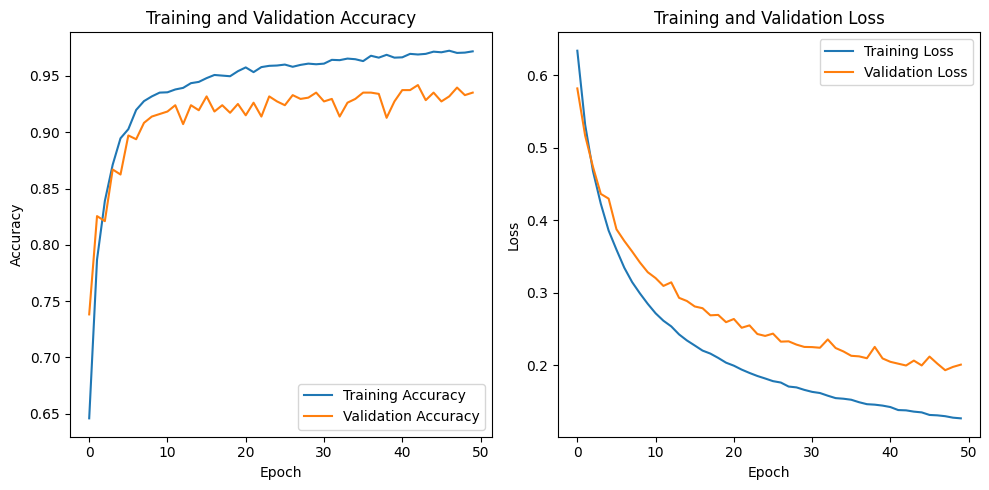

In [19]:
# Step 7: Plot the training history to see accuracy and loss curves
def plot_history(history):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

In [23]:
# Step 8: Evaluate the model on the test set
def evaluate_model(model, test_generator):
    model.load_weights('best_neuron.keras')
    loss, accuracy = model.evaluate(test_generator)
    print('Test Loss: {}, Test Accuracy: {}'.format(loss, accuracy))

In [24]:
# Test the model
test_generator = val_generator
evaluate_model(model, test_generator)

28/28 [==============================] - 0s 8ms/step - loss: 0.1999 - accuracy: 0.9418
Test Loss: 0.1998700499534607, Test Accuracy: 0.9418344497680664


In [34]:
# Step 2: Define the model with multiple layers
def create_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    
    return model

In [35]:
# Step 3: Train the model with early stopping
def train_model(model, train_generator, val_generator, batch_size=32, max_epochs=100, min_accuracy=0.95):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    checkpoint = ModelCheckpoint('multiple_layers.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', verbose=1)  # Stop if val_accuracy stops improving for 5 epochs
    history = model.fit(train_generator, epochs=max_epochs, batch_size=batch_size, validation_data=val_generator, callbacks=[checkpoint, early_stopping])
    
    return history

In [36]:
# Step 4: Load and preprocess the data
image_size = (32, 32)
batch_size = 32

def load_and_preprocess_data(data_dir, image_size):
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
    train_generator = datagen.flow_from_directory(data_dir, target_size=image_size, batch_size=batch_size, class_mode='binary', subset='training')
    val_generator = datagen.flow_from_directory(data_dir, target_size=image_size, batch_size=batch_size, class_mode='binary', subset='validation')
    
    return train_generator, val_generator

train_generator, val_generator = load_and_preprocess_data(data_dir, image_size)

Found 3576 images belonging to 2 classes.
Found 894 images belonging to 2 classes.


In [37]:
# Step 5: Create and compile the model
model = create_model(input_shape=(image_size[0], image_size[1], 3))  # 3 for RGB channels
model.summary()

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 128)       

In [38]:
# Step 6: Train the model
history = train_model(model, train_generator, val_generator, batch_size=batch_size, max_epochs=100, min_accuracy=0.95)

Epoch 1/100
112/112 [==============================] - ETA: 0s - loss: 0.4550 - accuracy: 0.7640
Epoch 1: val_accuracy improved from -inf to 0.93512, saving model to multiple_layers.keras
112/112 [==============================] - 2s 13ms/step - loss: 0.4550 - accuracy: 0.7640 - val_loss: 0.1752 - val_accuracy: 0.9351
Epoch 2/100
109/112 [============================>.] - ETA: 0s - loss: 0.0664 - accuracy: 0.9796
Epoch 2: val_accuracy improved from 0.93512 to 0.97092, saving model to multiple_layers.keras
112/112 [==============================] - 1s 11ms/step - loss: 0.0668 - accuracy: 0.9793 - val_loss: 0.0729 - val_accuracy: 0.9709
Epoch 3/100
109/112 [============================>.] - ETA: 0s - loss: 0.0399 - accuracy: 0.9879
Epoch 3: val_accuracy improved from 0.97092 to 0.97651, saving model to multiple_layers.keras
112/112 [==============================] - 1s 12ms/step - loss: 0.0395 - accuracy: 0.9880 - val_loss: 0.0736 - val_accuracy: 0.9765
Epoch 4/100
110/112 [=============

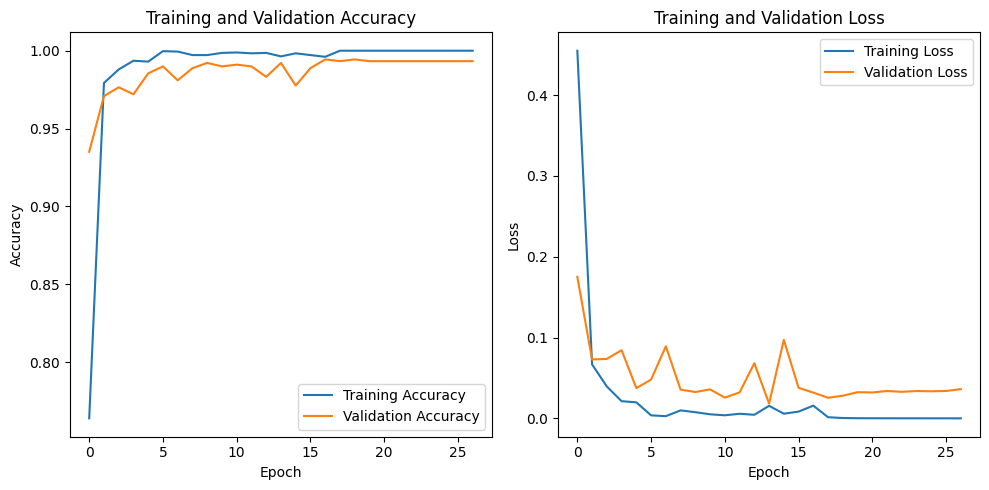

In [39]:
# Step 7: Plot the training history to see accuracy and loss curves
def plot_history(history):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

In [40]:
# Step 8: Evaluate the model on the test set
def evaluate_model(model, test_generator):
    model.load_weights('multiple_layers.keras')
    loss, accuracy = model.evaluate(test_generator)
    print('Test Loss: {}, Test Accuracy: {}'.format(loss, accuracy))

In [41]:
# Test the model
test_generator = val_generator
evaluate_model(model, test_generator)

28/28 [==============================] - 0s 8ms/step - loss: 0.0319 - accuracy: 0.9944
Test Loss: 0.03190184384584427, Test Accuracy: 0.9944071769714355
